# コーディングセッション

# 目的
[boston house prices dataset](http://archive.ics.uci.edu/ml/datasets/Housing)を使い、予測モデルを作って遊んでみる

1. CRIM: per capita crime rate by town 
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 
3. INDUS: proportion of non-retail business acres per town 
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
5. NOX: nitric oxides concentration (parts per 10 million) 
6. RM: average number of rooms per dwelling 
7. AGE: proportion of owner-occupied units built prior to 1940 
8. DIS: weighted distances to five Boston employment centres 
9. RAD: index of accessibility to radial highways 
10. TAX: full-value property-tax rate per $10,000 

11. PTRATIO: pupil-teacher ratio by town 
12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
13. LSTAT: % lower status of the population 
14. MEDV: Median value of owner-occupied homes in $1000's

# ルール

- 線形回帰モデル（sklearn.linear_model.LinearRegression）を使う
- 可視化する

# オプショナル

- Cross Variadation (sklearn.cross_validation)を使う
- ハイパーパラメータの最適化を行う
- 複数のモデルを比較する

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
from sklearn import datasets

In [4]:
import numpy as np

In [5]:
boston = datasets.load_boston()

In [6]:
X = boston.data
y = boston.target

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

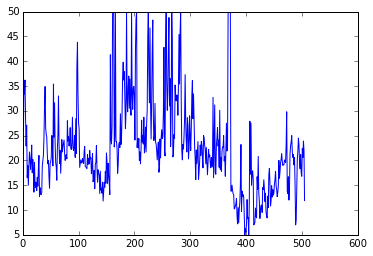

In [8]:
plt.plot(y)

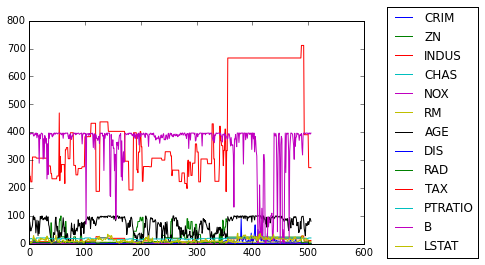

In [9]:
plt.plot(X);
plt.legend(boston.feature_names, loc='center left', bbox_to_anchor=(1.05, 0.5))

In [10]:
from sklearn import linear_model

In [11]:
np.random.permutation(5)

array([4, 2, 3, 1, 0])

In [12]:
np.random.seed(0)
indices = np.random.permutation(X.shape[0])
X = X[indices]
y = y[indices]

## １つの特徴量だけを用いる場合

(0, 50)

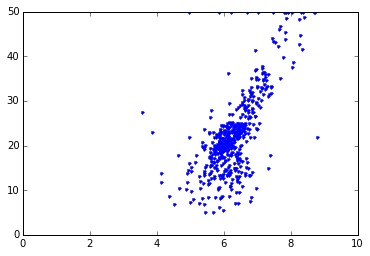

In [13]:
plt.plot(X[:,5], y, '.')
plt.xlim(0, 10)
plt.ylim(0, 50)

In [14]:
X_room = X[:, 5].reshape([-1, 1])

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
linreg = LinearRegression()
linreg.fit(X_room[:-100], y[:-100])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
x_line = np.linspace(3,  9, 100) 
y_line = linreg.coef_[0] * x_line + linreg.intercept_

In [18]:
linreg.coef_

array([ 8.54034767])

In [19]:
linreg.intercept_

-31.058238574537214

(0, 50)

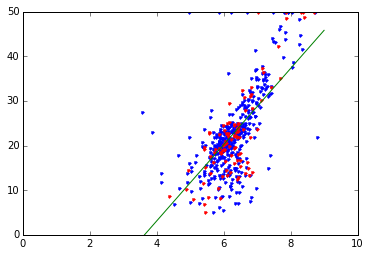

In [20]:
plt.plot(X_room[:-100], y[:-100], '.b')
plt.plot(X_room[-100:], y[-100:], '.r')
plt.plot(x_line, y_line, 'g')
plt.xlim(0, 10)
plt.ylim(0, 50)

In [21]:
print("Adjusted R-square (traininig data): {0}".format(linreg.fit(X_room[:-100], y[:-100]).score(X_room[:-100], y[:-100])))
print("Adjusted R-square (test data): {0}".format(linreg.fit(X_room[:-100], y[:-100]).score(X_room[-100:], y[-100:])))

Adjusted R-square (traininig data): 0.436320403391
Adjusted R-square (test data): 0.627094485536


## 全ての特徴量を用いる場合

In [22]:
X_train = X[:-100]
y_train = y[:-100]
X_test = X[-100:]
y_test = y[-100:]

In [23]:
linreg = linear_model.LinearRegression()

In [24]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
linreg.score(X_test, y_test)

0.83777023443939025

In [26]:
linreg.score(X_train, y_train)

0.70679565813245215

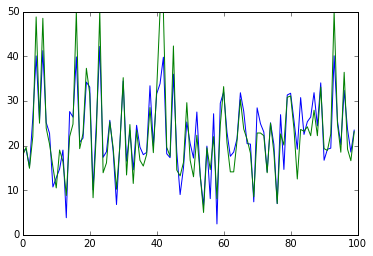

In [27]:
plt.plot(linreg.predict(X_test))
plt.plot(y_test)

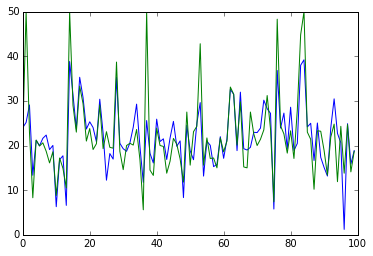

In [28]:
plt.plot(linreg.predict(X_train[:100]))
plt.plot(y_train[:100])

## Ridge Regression

In [29]:
ridge = linear_model.Ridge()

In [30]:
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, solver='auto', tol=0.001)

In [31]:
ridge.score(X_test, y_test)

0.8339628774918757

In [32]:
ridge.score(X_train, y_train)

0.70435468838405502

## Lasso Regression

In [33]:
lasso = linear_model.Lasso()

In [34]:
lasso.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [35]:
lasso.score(X_test, y_test)

0.71939087579911898

In [36]:
lasso.score(X_train, y_train)

0.64732096344786183

# Cross Validation

In [37]:
ridge = linear_model.Ridge()

In [38]:
alphas = np.logspace(-2, 1, 50)

In [39]:
from sklearn import cross_validation

In [40]:
scores = []
for alpha in alphas:
    ridge.set_params(alpha=alpha)
    score = cross_validation.cross_val_score(ridge, X, y, cv=10)
    scores.append(score)

In [41]:
scores = np.array(scores)

In [42]:
m = scores.mean(axis=1)
s = scores.std(axis=1)

[]

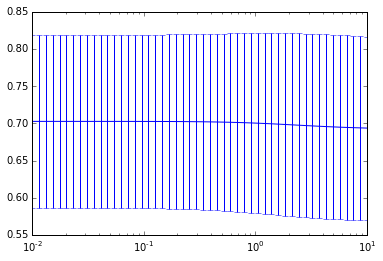

In [43]:
plt.errorbar(alphas, m, yerr=s)
plt.semilogx()

# SVR

In [44]:
from sklearn import svm

In [45]:
from sklearn import preprocessing

In [46]:
scaler = preprocessing.StandardScaler()

In [47]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [48]:
X = scaler.transform(X)

In [49]:
kernel = 'rbf'
#kernel = 'poly'
#kernel = 'linear'

svr = svm.SVR(kernel=kernel)

In [50]:
svr

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.0,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [51]:
if kernel == 'rbf':
    params = np.logspace(-6, -1, 50)
elif kernel == 'poly':
    params = np.arange(0, 8)
elif kernel == 'linear':
    params = np.logspace(-6, 1, 50)

scores = []
for param in params:
    #svr.set_params(kernel='rbf', gamma=param)
    if kernel == 'rbf':
        svr.set_params(gamma=param)        
    elif kernel == 'poly':
        svr.set_params(degree=param)
    elif kernel == 'linear':
        svr.set_params(C=param)
    
    score = cross_validation.cross_val_score(svr, X, y, cv=5)
    scores.append(score)
    
scores = np.array(scores)

m = scores.mean(axis=1)
s = scores.std(axis=1)

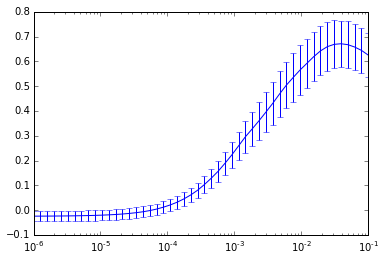

In [52]:
plt.errorbar(params, m, yerr=s)

if kernel in ['rbf', 'linear']:
    plt.semilogx()

In [53]:
params[np.argmax(m)]

0.039069399370546209

## 複数のモデルを比較

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

In [55]:
from sklearn import datasets

boston = datasets.load_boston()

In [56]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], 
      dtype='|S7')

In [57]:
X = boston.data
y = boston.target

In [58]:
np.random.seed(0)
N = len(X)
rp = np.random.permutation(N)

In [59]:
X = X[rp]
y = y[rp]

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [61]:
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    SVR(),
    RandomForestRegressor(),
    GradientBoostingRegressor()
]

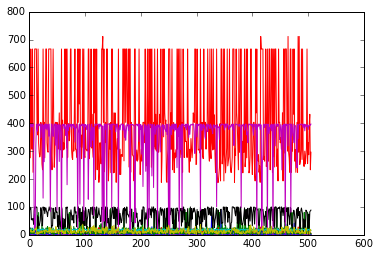

In [62]:
plt.plot(X);

In [63]:
from sklearn import preprocessing

In [64]:
X = preprocessing.scale(X)

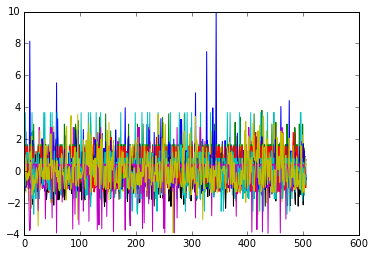

In [65]:
plt.plot(X);

In [66]:
from sklearn import cross_validation

In [67]:
from sklearn.metrics import mean_squared_error as mse

In [68]:
metrics = {}
y_pred_trains = {}
y_pred_tests = {}

n_folds = 10
n_keep = 100

model_names = []

for model in models:
    
    print model
    model_name = str(model).split("(")[0]
    model_names.append(model_name)
    metrics[model_name] = np.zeros([2, n_folds])

    # Cross-validation generatorを作成
    kf = cross_validation.KFold(N, n_folds=n_folds)
    
    for i_fold, (train_idx, test_idx) in enumerate(kf):
        
        # モデルのトレーニング（Learning）
        model.fit(X[train_idx, :], y[train_idx])

        # 予測（Estimation）
        y_pred_train = model.predict(X[train_idx, :])
        y_pred_test = model.predict(X[test_idx, :])

        # 予測精度の計算（Mean Squared Errors）
        train_mse = mse(y[train_idx], y_pred_train)
        test_mse = mse(y[test_idx], y_pred_test)

        # 予測精度を保存
        metrics[model_name][0, i_fold] = train_mse
        metrics[model_name][1, i_fold] = test_mse

        if i_fold == 0:
            
            # 描画用に予測と真実を保存
            y_pred_trains['truth'] = y[train_idx]
            y_pred_trains[model_name] = y_pred_train
            
            y_pred_tests['truth'] = y[test_idx]
            y_pred_tests[model_name] = y_pred_test
        
        print train_mse
        print test_mse
        print "------------"

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
19.9413710852
41.7103476884
------------
21.4522220273
27.2816863888
------------
22.3888417196
18.0063600516
------------
22.3271773862
18.8749083761
------------
21.8553971029
23.7063396174
------------
22.5425986485
16.7851117843
------------
22.1777154784
19.8762205748
------------
20.0686953062
39.3060897165
------------
22.2591203385
19.9512636442
------------
22.9940781045
12.5041704294
------------
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, solver='auto', tol=0.001)
19.9424119941
41.8405512744
------------
21.4534969285
27.2404329188
------------
22.3901688258
17.951466623
------------
22.3285699603
18.7896765795
------------
21.8565688356
23.6969921504
------------
22.5439089736
16.76623751
------------
22.1788582673
19.9251809932
------------
20.0699187388
39.3467131456
------------
22.2604408438
19.9970659173
------------
22.9956216916
12.3908864281
--------

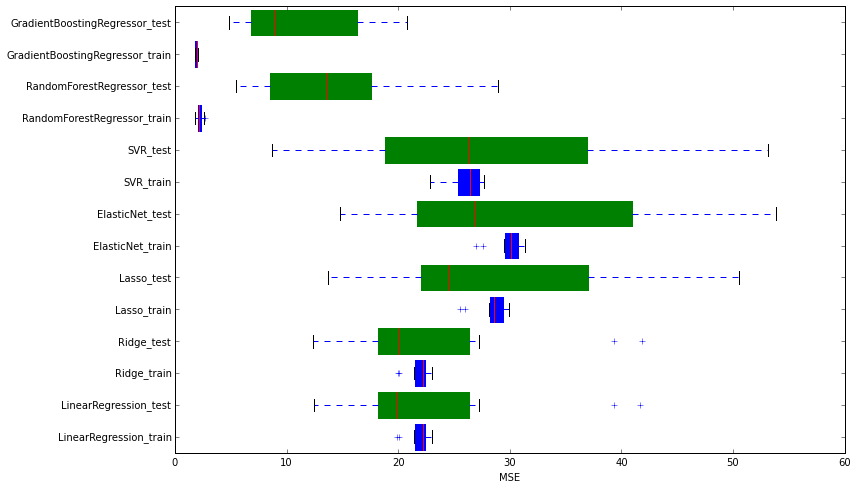

In [69]:
plt.clf()
plt.figure(figsize=(12, 8))

ylabels = []

#for i, (k, v) in enumerate(metrics.items()):
for i, k in enumerate(model_names):
    
    v = metrics[k]
    
    bp = plt.boxplot(v.transpose(), positions=[2*i, 2*i+1], vert=False, patch_artist=True, widths=0.8)
    ylabels += [k+"_train" , k+"_test"]
    for j, box in enumerate(bp['boxes']):
        if j % 2 == 0:
            box.set(color = 'blue')
            box.set(facecolor = 'blue')
        if j % 2 == 1:
            box.set(color = 'green')
            box.set(facecolor = 'green')

n_box = len(metrics) * 2
plt.yticks(np.arange(n_box), ylabels)
plt.ylim([-0.5, n_box-0.5])
plt.xlabel("MSE")

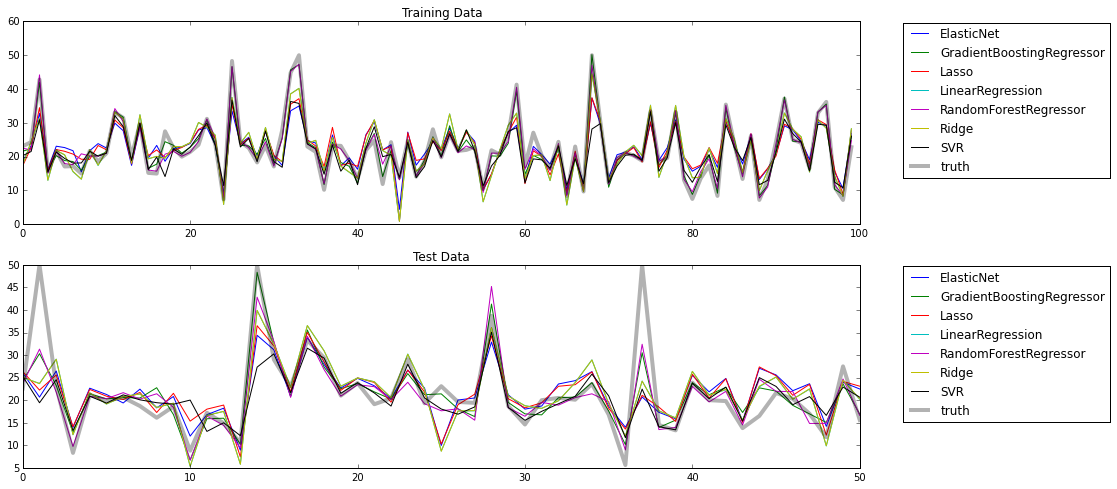

In [70]:
plt.clf()
plt.figure(figsize=(15, 8))

plt.subplot(2,1,1)
for k in sorted(y_pred_trains.keys()):
    line = plt.plot(y_pred_trains[k][:100])
    if k == 'truth':
        plt.setp(line, linewidth=4, alpha=0.3, color='k')    
plt.legend(sorted(y_pred_trains.keys()), bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.1)
plt.title("Training Data")

plt.subplot(2,1,2)
for k in sorted(y_pred_tests.keys()):
    line = plt.plot(y_pred_tests[k][:100])
    if k == 'truth':
        plt.setp(line, linewidth=4, alpha=0.3, color='k')
plt.legend(sorted(y_pred_tests.keys()), bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.1)
plt.title("Test Data")

In [71]:
model = models[5]

In [72]:
#params = 2**np.arange(1, 10)
params = np.arange(2, 15)

train_mses = []
test_mses = []

for param in params:
    
    kf = cross_validation.KFold(N, n_folds=10)
    
    #model.set_params(n_estimators=param)
    model.set_params(max_depth=param)
    
    this_train_mses = []
    this_test_mses = []
    
    for train_idx, test_idx in kf:
        
        model.fit(X[train_idx], y[train_idx])
        
        y_pred_train = model.predict(X[train_idx])
        y_pred_test = model.predict(X[test_idx])
        
        # 予測精度の計算（Mean Squared Errors）
        train_mse = mse(y[train_idx], y_pred_train)
        test_mse = mse(y[test_idx], y_pred_test)
        
        this_train_mses.append(train_mse)
        this_test_mses.append(test_mse)
        
    train_mses.append(this_train_mses)
    test_mses.append(this_test_mses)

In [73]:
train_mses = np.array(train_mses)
test_mses = np.array(test_mses)

In [74]:
train_m = train_mses.mean(axis=1)
train_s =train_mses.std(axis=1)

In [75]:
test_m = test_mses.mean(axis=1)
test_s =test_mses.std(axis=1)

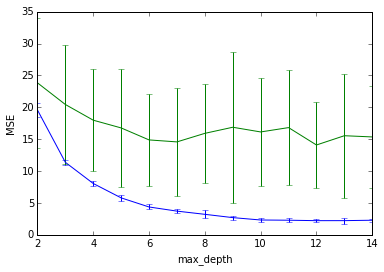

In [76]:
plt.errorbar(params, train_m, yerr=train_s)
plt.errorbar(params, test_m, yerr=test_s)
#plt.semilogx()

plt.ylabel("MSE")
#plt.xlabel("n_estimators")
plt.xlabel("max_depth")

In [77]:
params[np.argmin(test_m)]

12